In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv("D:\DATA SCIENCE\Machine Learning\Deep Learning\Admission_Predict_Ver1.1.csv")

In [3]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
df.shape

(500, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [6]:
df.duplicated().sum()

0

In [7]:
df.drop(columns=['Serial No.'],inplace=True)

In [8]:
X =df.iloc[:,:-1]
y=df.iloc[:,-1]

In [9]:
X

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1
496,337,117,5,5.0,5.0,9.87,1
497,330,120,5,4.5,5.0,9.56,1
498,312,103,4,4.0,5.0,8.43,0


In [10]:
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
495    0.87
496    0.96
497    0.93
498    0.73
499    0.84
Name: Chance of Admit , Length: 500, dtype: float64

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=19)

In [12]:
X_train

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
496,337,117,5,5.0,5.0,9.87,1
288,314,104,4,5.0,5.0,9.02,0
446,327,118,4,5.0,5.0,9.67,1
347,299,94,1,1.0,1.0,7.34,0
184,316,106,2,2.5,4.0,8.32,0
...,...,...,...,...,...,...,...
424,325,114,5,4.0,5.0,9.46,1
354,297,98,2,2.5,3.0,7.67,0
245,328,110,4,4.0,2.5,9.02,1
110,305,108,5,3.0,3.0,8.48,0


In [13]:
from sklearn.preprocessing import MinMaxScaler

In [14]:
scaler = MinMaxScaler()
X_train_scaled =scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [16]:
X_train_scaled

array([[0.94      , 0.88888889, 1.        , ..., 1.        , 0.98397436,
        1.        ],
       [0.48      , 0.40740741, 0.75      , ..., 1.        , 0.71153846,
        0.        ],
       [0.74      , 0.92592593, 0.75      , ..., 1.        , 0.91987179,
        1.        ],
       ...,
       [0.76      , 0.62962963, 0.75      , ..., 0.375     , 0.71153846,
        1.        ],
       [0.3       , 0.55555556, 1.        , ..., 0.5       , 0.53846154,
        0.        ],
       [0.22      , 0.14814815, 0.25      , ..., 0.5       , 0.34615385,
        1.        ]])

In [17]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [30]:
model = Sequential()

#Input Layer : input_dim = 7

#Hidden Layer 1 (7 nodes)
model.add(Dense(7,activation= 'relu',input_dim=7))

#Hidden Layer 2 (10 nodes)
model.add(Dense(10,activation= 'relu'))

# Output Layer(In Regression type problem the activation function for Output Layer is 'linear')
model.add(Dense(1,activation='linear'))

In [31]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 7)                 56        
                                                                 
 dense_5 (Dense)             (None, 10)                80        
                                                                 
 dense_6 (Dense)             (None, 1)                 11        
                                                                 
Total params: 147 (588.00 Byte)
Trainable params: 147 (588.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [32]:
model.compile(loss='mean_squared_error',optimizer = 'Adam')

In [33]:
history = model.fit(X_train_scaled,y_train,epochs=25,validation_split=0.2)

Epoch 1/25
10/10 [==============================] - 1s 13ms/step - loss: 0.0810 - val_loss: 0.0485
Epoch 2/25
10/10 [==============================] - 0s 5ms/step - loss: 0.0332 - val_loss: 0.0244
Epoch 3/25
10/10 [==============================] - 0s 5ms/step - loss: 0.0273 - val_loss: 0.0211
Epoch 4/25
10/10 [==============================] - 0s 4ms/step - loss: 0.0234 - val_loss: 0.0196
Epoch 5/25
10/10 [==============================] - 0s 5ms/step - loss: 0.0208 - val_loss: 0.0187
Epoch 6/25
10/10 [==============================] - 0s 4ms/step - loss: 0.0194 - val_loss: 0.0174
Epoch 7/25
10/10 [==============================] - 0s 4ms/step - loss: 0.0182 - val_loss: 0.0159
Epoch 8/25
10/10 [==============================] - 0s 5ms/step - loss: 0.0169 - val_loss: 0.0145
Epoch 9/25
10/10 [==============================] - 0s 5ms/step - loss: 0.0156 - val_loss: 0.0133
Epoch 10/25
10/10 [==============================] - 0s 4ms/step - loss: 0.0146 - val_loss: 0.0122
Epoch 11/25
10/10 

In [34]:
y_pred = model.predict(X_test_scaled)

4/4 [==============================] - 0s 2ms/step


In [35]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.6799075048142422

In [36]:
import matplotlib.pyplot as plt

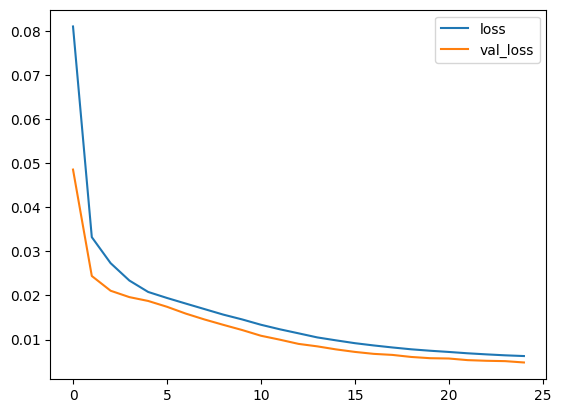

In [39]:
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.legend()
plt.show()